# Subqueries and CTE exercises

### Exercise 1: Simple Subquery
Retrieve the names of categories that have more than 5 products.



```sql

SELECT category_name
FROM categories
WHERE category_id IN (
	-- Subquery find all category_ids with more than 5 counts
	SELECT product_category_id as category_id
	FROM products
	GROUP BY product_category_id
	HAVING COUNT(1) > 5
);

```
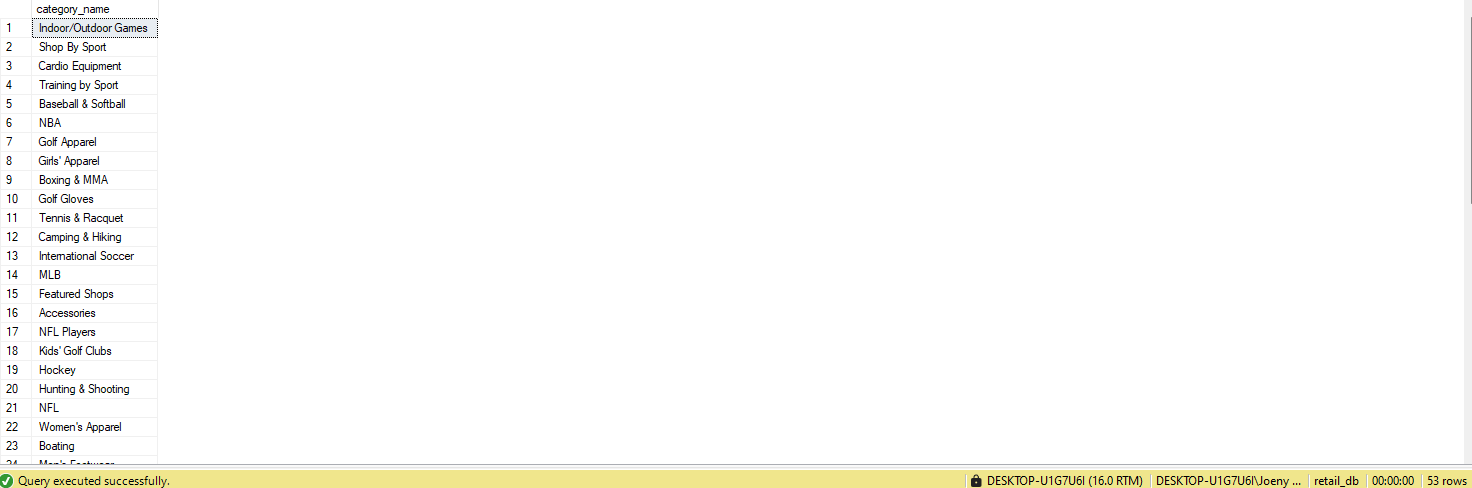

### Exercise 2: Subquery in WHERE Clause
Find all orders placed by customers who have made more than 10 purchases in total.

```sql

WITH customer_ten AS (
	SELECT order_customer_id
	FROM orders
	GROUP BY order_customer_id
	HAVING COUNT(1) > 10
)
SELECT 
	order_id,
	o.order_customer_id as customer_id
FROM orders o
JOIN customer_ten c10 ON c10.order_customer_id = o.order_customer_id
ORDER BY o.order_customer_id


```
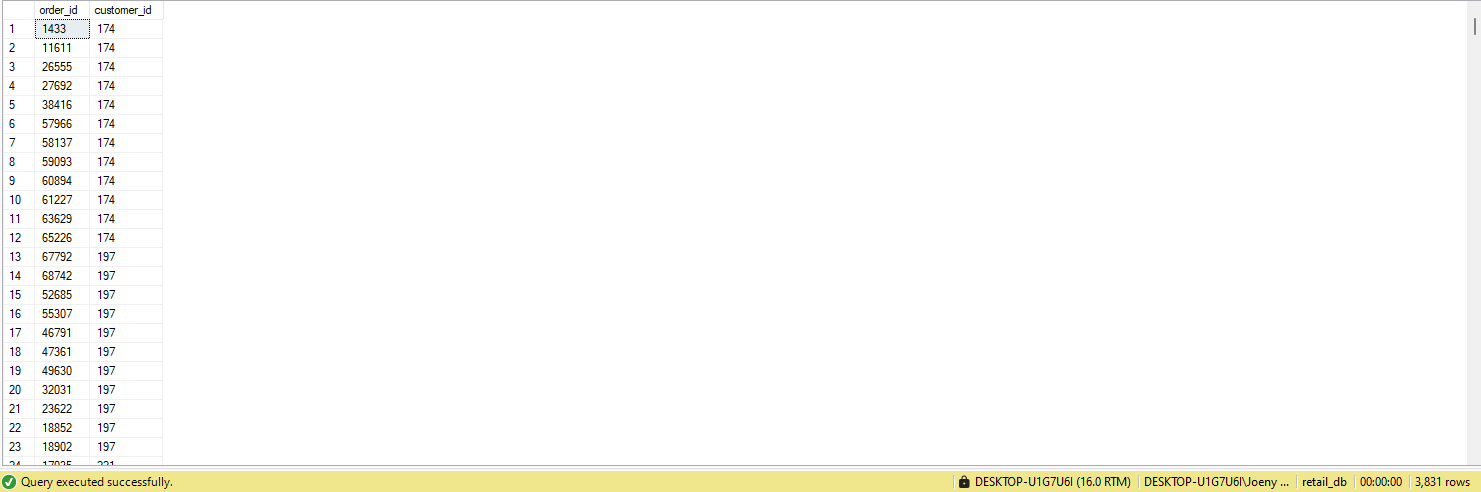

### Exercise 3: Subquery in SELECT Clause
Display the product names along with the average price of all products that were ordered in October 2013.

```sql

SELECT 
	product_name,
	AVG(order_item_product_price) OVER () avg_price
FROM (
	SELECT order_id
	FROM orders
	WHERE YEAR(order_date)=2013 AND MONTH(order_date)=10
) o
JOIN order_items oi ON oi.order_item_order_id = o.order_id
JOIN products p ON p.product_id = oi.order_item_product_id
GROUP BY product_name,order_item_product_price;

```
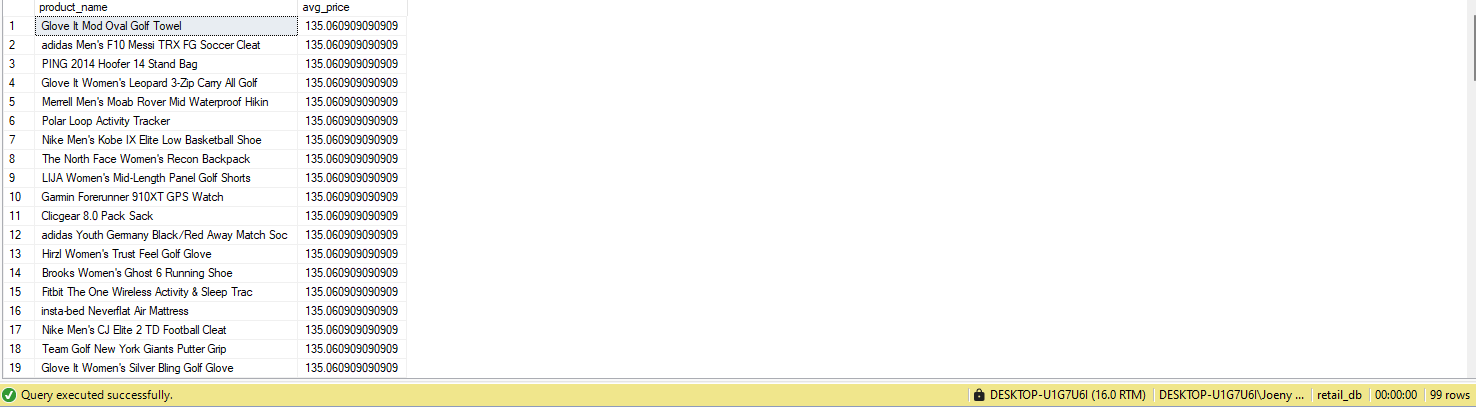

### Exercise 4: Subquery with Aggregate Functions
List the orders that have a total amount greater than the average order amount.

```sql

with order_sum AS (
	SELECT
		order_item_order_id,
		SUM(order_item_subtotal) as total_order_cost
	FROM order_items
	GROUP BY order_item_order_id
)

SELECT
	order_item_order_id order_id,
	total_order_cost
FROM order_sum
WHERE total_order_cost > (
	SELECT AVG(os.total_order_cost)
	FROM order_sum os
)
ORDER BY order_id;

```
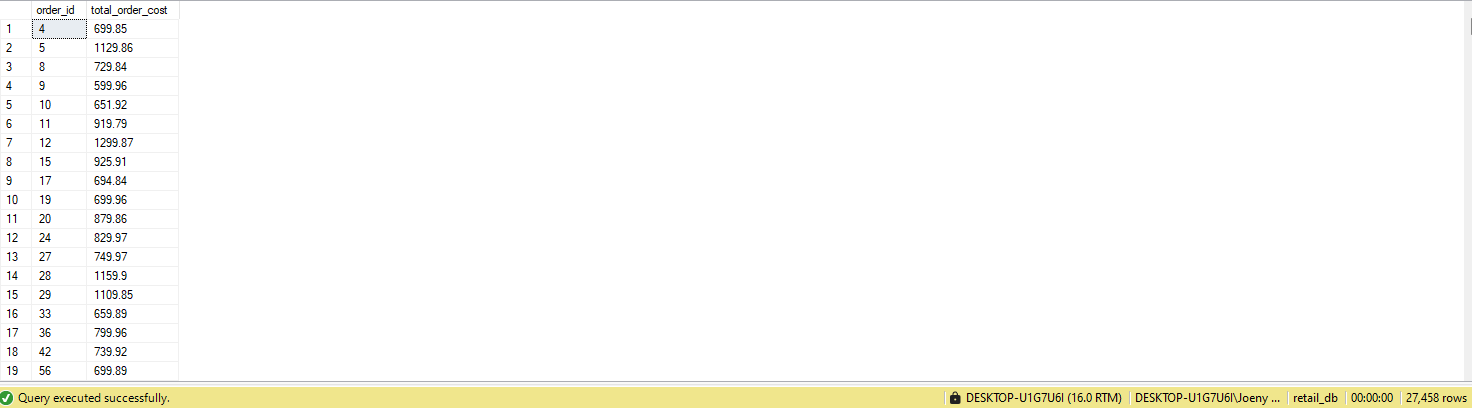

### Exercise 5: Basic Common Table Expression (CTE)
Use a CTE to find the top 3 categories based on the number of products.

```sql

WITH product_count AS (
	SELECT 
		product_category_id,
		COUNT(1) as product_count
	FROM products
	GROUP BY product_category_id
)
SELECT TOP 3
	category_id,
	category_name,
	p.product_count
FROM categories c
JOIN product_count p ON p.product_category_id = c.category_id
ORDER BY p.product_count DESC; 

```
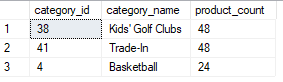

### Exercise 6: Nested CTEs
Identify the customers who have spent more than the average spending of customers in the month of December.

```sql

WITH order_total AS (
	SELECT
		o.order_customer_id,
		SUM(order_item_subtotal) as total
	FROM order_items oi
	JOIN orders o ON o.order_id = oi.order_item_order_id
	WHERE MONTH(o.order_date) = 12
	GROUP BY o.order_customer_id

)
SELECT
	c.customer_id,
	c.customer_fname,
	c.customer_lname,
	CAST(ot.total as DECIMAL(18,2)) AS total_spending
FROM customers c
JOIN order_total ot ON c.customer_id = ot.order_customer_id
WHERE ot.total > (
	SELECT AVG(ot2.total)
	FROM order_total ot2
)
ORDER BY customer_id

```
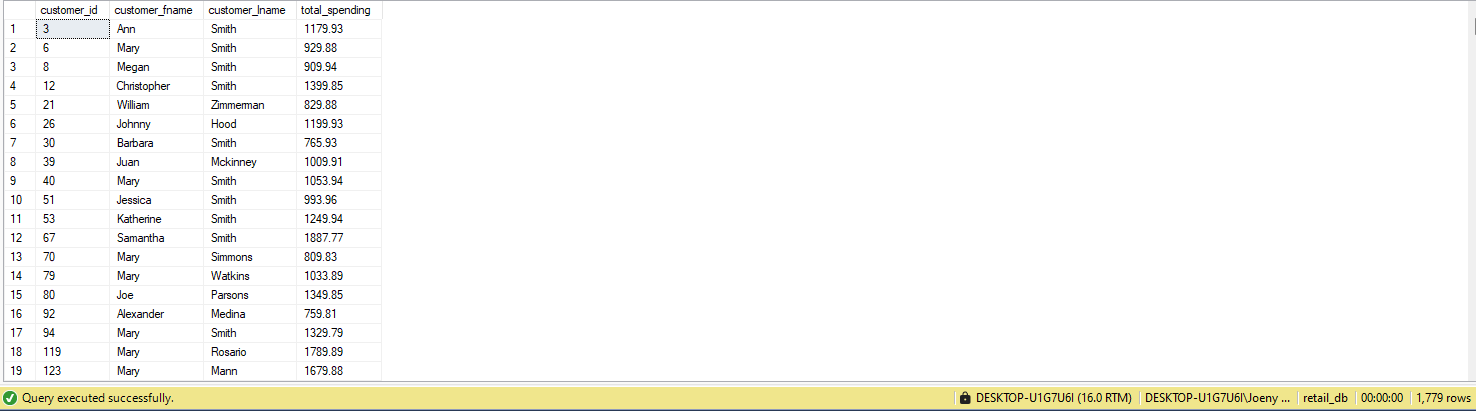